# Explore Hunting and Fishing License Data
This notebook delves into a preliminary analysis of the hunting and fishing data organized in `organize_licenses.ipynb`

In [1]:
%pylab inline
import pandas as pd
import xarray as xr
import os
from tqdm.autonotebook import tqdm

Populating the interactive namespace from numpy and matplotlib


/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """


In [2]:
license_df = pd.read_csv('/pool0/home/steinadi/data/drought/DatabaseDrafts/HuntingLicenses_OR/OR_Hunting_Fishing_Licenses_2016_2020.csv')

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
license_df

,id,NAME,ADDRESS,CITY,STATE,ZIP,LICENSE TYPE,LICENSE DESCRIPTION,ISSUE DATE,PHONE NUMBER,RESIDENCY,GENDER,AGE,ISSUE DATETIME
0,275220,"ROGERS, VERLA M",1646 KING WAY,WOODBURN,OR,97071,10160,ANNUAL SHELLFISH,12/1/2015,5.039824e+09,Unknown,F,82.0,2015-12-01
1,249706,"MITCHELL, CHARLES L",1842 CHERRY ST,UMATILLA,OR,97882,10160,ANNUAL SHELLFISH,12/1/2015,5.419226e+09,Unknown,M,71.0,2015-12-01
2,563279,"SCOTT, MICHAEL W",64643 BOONES BOROUGH DR,BEND,OR,97701.0,10574,PIONEER COMBINATION WITH COLUMBIA BASIN ENDORS...,12/1/2015,5.413890e+09,Unknown,M,69.0,2015-12-01
3,250978,"MOORE, LAWRENCE H",5247 TERESA WAY,CENTRAL POINT,OR,97502,10565,DISABLED VET SHELLFISH,12/1/2015,5.416644e+09,Unknown,M,60.0,2015-12-01
4,879870,"SIMMONS, WILLIAM R",623 DRIFTWOOD,EUGENE,OR,97402.0,10573,WHEELCHAIR ANGLING WITH COLUMBIA BASIN ENDORS...,12/1/2015,5.414631e+09,Unknown,M,53.0,2015-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310648,4384474,"KIENE, ROBERT N",1340 SW Gilson St,MCMINNVILLE,Oregon,97128,0101,Annual Combination License,01/01/2021,0.000000e+00,Resident,Male,79.0,2021-01-01
5310649,4248860,"Pearson, Dawn K",33040 E Lake Holm Dr SE,AUBURN,Washington,98092,0140A,Annual Shellfish License,1/1/2021,0.000000e+00,Non-Resident,Female,55.0,2021-01-01
5310650,5202549,NaN,NaN,NaN,NaN,NaN,0136B,Columbia River Basin Endorsement (Free),1/1/2021,NaN,Resident,Male,12.0,2021-01-01
5310651,5080345,NaN,NaN,NaN,NaN,NaN,0136B,Columbia River Basin Endorsement (Free),1/1/2021,NaN,Resident,Female,13.0,2021-01-01


In [4]:
# let's get some fundamental counts. I'll just use the id column to trim down data
license_counts = license_df.groupby(['LICENSE TYPE', 'ISSUE DATE']).count()['id']
# take a look at what we got
license_counts

LICENSE TYPE  ISSUE DATE
10100         1/1/2016      341
              1/1/2017      220
              1/10/2016     119
              1/10/2017      80
              1/11/2016      82
                           ... 
21060         12/5/2017      15
              12/6/2017       9
              12/7/2017      22
              12/8/2017      28
              12/9/2017      23
Name: id, Length: 52322, dtype: int64

In [5]:
# okay, now I want to be able to plot each of those licenses as their own timeseries ...
# but first I need to map the types and descriptions to each other

type_to_description = dict()
license_types = []

for type, description in tqdm(zip(license_df['LICENSE TYPE'].values, license_df['LICENSE DESCRIPTION'].values), total=len(license_df)):
    if type not in license_types:
        license_types.append(type)
        type_to_description[type] = description

  0%|          | 0/5310653 [00:00<?, ?it/s]

In [6]:
type_to_description

{10160: 'ANNUAL SHELLFISH',
 10574: 'PIONEER COMBINATION WITH COLUMBIA BASIN ENDORSEMENT',
 10565: 'DISABLED VET SHELLFISH',
 10573: 'WHEELCHAIR ANGLING WITH COLUMBIA  BASIN ENDORSEMENT',
 10102: 'ANNUAL ANGLING',
 10100: 'SPORTS PAC COMBINATION',
 10167: 'YOUTH SPORTS PAC COLUMBIA  BASIN ENDORSEMENT',
 10161: 'ANNUAL ANGLING WITH COLUMBIA  BASIN ENDORSEMENT',
 10162: 'COMBINATION WITH COLUMBIA  BASIN ENDORSEMENT',
 10103: 'HUNTING',
 10166: 'SPORTS PAC COMBINATION WITH COLUMBIA  BASIN ENDORSEMENT',
 10152: 'SENIOR ANGLING LICENSE',
 10101: 'COMBINATION',
 21016: 'TWO-ROD ANGLING LICENSE',
 10168: 'NON-RESIDENT ANGLING WITH COLUMBIA BASIN ENDORSEMENT',
 10142: 'YOUTH 12-17  LICENSE',
 10202: 'NON-RESIDENT ANGLING',
 21022: 'COLUMBIA BASIN ENDORSEMENT',
 10575: 'DISABLED VET COMBO WITH COLUMBIA  BASIN ENDORSEMENT',
 10165: 'SENIOR ANGLING  WITH COLUMBIA  BASIN ENDORSEMENT',
 10179: 'YOUTH UNDER 12 ANGLING LICENSE COLUMBIA  BASIN ENDORSE',
 10153: 'SENIOR HUNTING LICENSE',
 10203: 'NON-R

In [7]:
len(type_to_description)

123

hmmm .... might want to separate this into more helpful big categories ...

writing this dictionary into a csv then doing this by hand (renamed as `license_names_sorted.csv`)

In [8]:
#import csv
#w = csv.writer(open("license_names.csv", "w"))
#for key, val in type_to_description.items():
#    w.writerow([key, val])

More info that may help:    
[OR Hunting & Fishing Licenses](https://myodfw.com/fishing/licensing-info)

Licenses:
- Annual Angling License
- Sports Pac
- Combined Angling and Hunting

Endorsements and validations
- Two-rod Validation
- Columbia River Basin Endorsement

Tags
- Adult Combined Angling Tag
- Hatchery Salmon/Steelhead Harvest Card

Youth Licenses
- Annual Combination License
- Youth Sports Pac
- Youth Tags

Resident Senior and Pioneer Licenses
- Senior Angling
- Senior Combination
- Pioneer Combination

Disabled Veteran and Uniformed Service Member licenses
- Uniformed Services Angling
- Disabled Veteran Combination

Daily/multi-day licenses, includes Combined Angling Tag
- One Day Angling
- Two Day Angling
- Three Day Angling
- Seven Day Angling
- Daily ANgling and Shellfish Combo
- Three-day Shellfish
- Columbia River Basin Endorsement (each day)

Other permits and applications
- Duplicate License, Tag, or Permit
- Wildlife Area Parking Permit
- Waterway Access Permit
- Aquatic Invasive Species Prevention Permit - Motorized Boats
- Oregon Disabilities Hunting and Fishing Permit

In [9]:
# Let's try counting these different categories
license_df['LICENSE CATEGORY'] = None
license_df.head()

,id,NAME,ADDRESS,CITY,STATE,ZIP,LICENSE TYPE,LICENSE DESCRIPTION,ISSUE DATE,PHONE NUMBER,RESIDENCY,GENDER,AGE,ISSUE DATETIME,LICENSE CATEGORY
0,275220,"ROGERS, VERLA M",1646 KING WAY,WOODBURN,OR,97071,10160,ANNUAL SHELLFISH,12/1/2015,5.039824e+09,Unknown,F,82.0,2015-12-01,None
1,249706,"MITCHELL, CHARLES L",1842 CHERRY ST,UMATILLA,OR,97882,10160,ANNUAL SHELLFISH,12/1/2015,5.419226e+09,Unknown,M,71.0,2015-12-01,None
2,563279,"SCOTT, MICHAEL W",64643 BOONES BOROUGH DR,BEND,OR,97701.0,10574,PIONEER COMBINATION WITH COLUMBIA BASIN ENDORS...,12/1/2015,5.413890e+09,Unknown,M,69.0,2015-12-01,None
3,250978,"MOORE, LAWRENCE H",5247 TERESA WAY,CENTRAL POINT,OR,97502,10565,DISABLED VET SHELLFISH,12/1/2015,5.416644e+09,Unknown,M,60.0,2015-12-01,None
4,879870,"SIMMONS, WILLIAM R",623 DRIFTWOOD,EUGENE,OR,97402.0,10573,WHEELCHAIR ANGLING WITH COLUMBIA BASIN ENDORS...,12/1/2015,5.414631e+09,Unknown,M,53.0,2015-12-01,None


In [10]:
# assigning categories will take enough time that I need to do
# it in parallel
#from distributed import Client

# setup Dask Client
#client = Client(threads_per_worker=1, n_workers=30)
#print(f"Dask Client: {client.dashboard_link}")

In [11]:
# organize by larger category that is relevant to us
# (while it could be interesting to sort by buyer type, I am
# more interested in what recreation activity is engaged in than
# who is engaging in it)

def assign_license_category(data, i):
    desc = data.loc[i, 'LICENSE DESCRIPTION'].upper()
    if 'ANGLING' in desc:
        if 'SHELLFISH' in desc:
            data.loc[i, 'LICENSE CATEGORY'] = 'ANGLING, SHELLFISH'
        else:
            data.loc[i, 'LICENSE CATEGORY'] = 'ANGLING'
    elif 'SHELLFISH' in desc:
        data.loc[i, 'LICENSE CATEGORY'] = 'SHELLFISH'
    elif 'COMBINATION' in desc or 'COMBO' in desc:
        data.loc[i, 'LICENSE CATEGORY'] = 'COMBINATION'
    elif 'SPORTS' in desc:
        data.loc[i, 'LICENSE CATEGORY'] = 'SPORTS'
    elif 'HUNTING' in desc or 'HUNTER' in desc:
        data.loc[i, 'LICENSE CATEGORY'] = 'HUNTING'

In [12]:
# need to use some parallelism to get them done in a reasonable time

# try adding in a tqdm next
#big_futures = [client.scatter(i) for i in tqdm(license_df.index)]

#futures = []
#for i in big_futures:
#    futures.append(client.submit(assign_license_category, {'data':license_df, 'i':i}))
#results = client.gather(futures)

Need a more efficient way, this is taking a ridiculous amount og time

In [13]:
bool(re.search('r', 'hello'))

False

In [14]:
test_string = license_df.loc[0, 'LICENSE DESCRIPTION']
print(test_string)

ANNUAL SHELLFISH


In [15]:
description_df = pd.DataFrame(license_df['LICENSE DESCRIPTION'].str.upper())
description_df

,LICENSE DESCRIPTION
0,ANNUAL SHELLFISH
1,ANNUAL SHELLFISH
2,PIONEER COMBINATION WITH COLUMBIA BASIN ENDORS...
3,DISABLED VET SHELLFISH
4,WHEELCHAIR ANGLING WITH COLUMBIA BASIN ENDORS...
...,...
5310648,ANNUAL COMBINATION LICENSE
5310649,ANNUAL SHELLFISH LICENSE
5310650,COLUMBIA RIVER BASIN ENDORSEMENT (FREE)
5310651,COLUMBIA RIVER BASIN ENDORSEMENT (FREE)


In [16]:
description_split_df = description_df['LICENSE DESCRIPTION'].str.split(' ', expand=True)
description_split_df.head()

,0,1,2,3,4,5,6,7,8,9
0,ANNUAL,SHELLFISH,None,None,None,None,None,None,None,None
1,ANNUAL,SHELLFISH,None,None,None,None,None,None,None,None
2,PIONEER,COMBINATION,WITH,COLUMBIA,BASIN,ENDORSEMENT,None,None,None,None
3,DISABLED,VET,SHELLFISH,None,None,None,None,None,None,None
4,WHEELCHAIR,ANGLING,WITH,COLUMBIA,,BASIN,ENDORSEMENT,None,None,None


In [17]:
found_idx, __ = np.where(description_split_df.values == 'SHELLFISH')

In [18]:
description_split_df.loc[found_idx]

,0,1,2,3,4,5,6,7,8,9
0,ANNUAL,SHELLFISH,None,None,None,None,None,None,None,None
1,ANNUAL,SHELLFISH,None,None,None,None,None,None,None,None
3,DISABLED,VET,SHELLFISH,None,None,None,None,None,None,None
10,DISABLED,VET,SHELLFISH,None,None,None,None,None,None,None
27,ANNUAL,SHELLFISH,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
5310641,ANNUAL,SHELLFISH,LICENSE,None,None,None,None,None,None,None
5310644,ANNUAL,SHELLFISH,LICENSE,None,None,None,None,None,None,None
5310645,ANNUAL,SHELLFISH,LICENSE,None,None,None,None,None,None,None
5310647,ANNUAL,SHELLFISH,LICENSE,None,None,None,None,None,None,None


In [19]:
license_df.loc[found_idx, 'LICENSE CATEGORY'] = 'SHELLFISH'

Okay, that's quick and actually works, awesome. We'll need to go back and fix the combination of angling and shellfish licenses, but we can just do this in order

In [20]:
shellfish_idx, __ = np.where(description_split_df.values == 'SHELLFISH')
angling_idx, __ = np.where(description_split_df == 'ANGLING')
angling_shellfish_idx = np.intersect1d(shellfish_idx, angling_idx)
hunting_idx, __ = np.where((description_split_df == 'HUNTER') | (description_split_df == 'HUNTING'))
combo_idx, __ = np.where((description_split_df == 'COMBINATION') | (description_split_df == 'COMBO'))
sports_idx, __ = np.where(description_split_df == 'SPORTS')

In [21]:
cat = 'LICENSE CATEGORY'

license_df.loc[shellfish_idx, cat] = 'SHELLFISH'
license_df.loc[angling_idx, cat] = 'ANGLING'
license_df.loc[angling_shellfish_idx, cat] = 'ANGLING, SHELLFISH'
license_df.loc[hunting_idx, cat] = 'HUNTING'
license_df.loc[combo_idx, cat] = 'COMBO'
license_df.loc[sports_idx, cat] = 'SPORTS'

In [22]:
license_category_counts = license_df.groupby(['LICENSE CATEGORY', 'ISSUE DATE']).count()
license_category_counts

id  NAME  ADDRESS  CITY  STATE  ZIP  \
LICENSE CATEGORY ISSUE DATE                                         
ANGLING          01/01/2018  382   382      382   382    382  382   
                 01/01/2019  343   343      343   343    343  343   
                 01/01/2020  202   202      202   202    202  202   
                 01/01/2021    1     1        1     1      1    1   
                 01/02/2018  457   457      457   457    457  457   
...                          ...   ...      ...   ...    ...  ...   
SPORTS           9/9/2016     32    20       20    20     20   20   
                 9/9/2017     17    13       13    13     13   13   
                 9/9/2018     16     8        8     8      8    8   
                 9/9/2019     14    11       11    11     11   11   
                 9/9/2020      9     6        6     6      6    6   

                             LICENSE TYPE  LICENSE DESCRIPTION  PHONE NUMBER  \
LICENSE CATEGORY ISSUE DATE                                                    
ANGLING          01/01/2018           382                  382           382   
                 01/01/2019           343                  343           343   
                 01/01/2020           202                  202           202   
                 01/01/2021             1                    1             1   
                 01/02/2018           457                  457           457   
...                                   ...                  ...           ...   
SPORTS           9/9/2016              32                   32            20   
                 9/9/2017              17                   17            13   
                 9/9/2018              16                   16             8   
                 9/9/2019              14                   14            11   
                 9/9/2020               9                    9             6   

                             RESIDENCY  GENDER  AGE  ISSUE DATETIME  
LICENSE CATEGORY ISSUE DATE                                          
ANGLING          01/01/2018        382     382  382             382  
                 01/01/2019        343     343  343             343  
                 01/01/2020        202     202  202             202  
                 01/01/2021          1       1    1               1  
                 01/02/2018        457     457  457             457  
...                                ...     ...  ...             ...  
SPORTS           9/9/2016           32      32   32              32  
                 9/9/2017           17      17   17              17  
                 9/9/2018           16      16   16              16  
                 9/9/2019           14      14   14              14  
                 9/9/2020            9       9    9               9  

[13388 rows x 13 columns]

<AxesSubplot:xlabel='ISSUE DATE'>

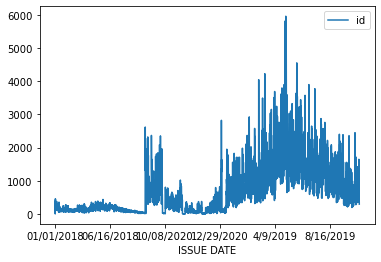

In [23]:
license_category_counts.loc['ANGLING', ['id']].plot()

Text(0.5, 1.0, 'OR Department of Fish and Wildlife')

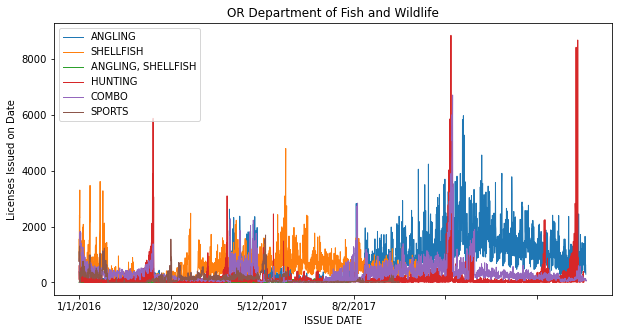

In [38]:
fig, ax = plt.subplots(figsize=(10,5))

license_cats = ['ANGLING', 'SHELLFISH', 'ANGLING, SHELLFISH', 'HUNTING', 'COMBO', 'SPORTS']

for license in license_cats:
    license_category_counts.loc[license, 'id'].plot(ax=ax, linewidth=1)
    

ax.legend(license_cats, loc='upper left')
ax.set_ylabel('Licenses Issued on Date')
ax.set_title('OR Department of Fish and Wildlife')